## Checking the versions 

In [2]:
import matplotlib
import sklearn
import pandas
import numpy

In [3]:
matplotlib.__version__

'3.4.3'

In [4]:
pandas.__version__

'1.3.2'

In [5]:
numpy.__version__

'1.19.5'

In [6]:
sklearn.__version__

'1.0.2'

In [7]:
!python --version

Python 3.8.0


## Loading the data 

In [8]:
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', None)

In [9]:
%matplotlib inline

In [10]:
df = pd.read_csv('D:/Novelis/Novelis_Code_Assessment/data/fraud_final_dataset.csv')

In [11]:
df.head()

,user_id,signup_time,purchase_time,elapsed_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,285108,7/15/2015 4:36,9/10/2015 14:17,2,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States
1,131009,1/24/2015 12:29,4/13/2015 4:53,3,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom
2,328855,3/11/2015 0:54,4/5/2015 12:23,1,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States
3,229053,1/7/2015 13:19,1/9/2015 10:12,0,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of
4,108439,2/8/2015 21:11,4/9/2015 14:26,2,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil


Let's try to understand what each column means,<br>
`user_id`: The user ID assigned to new users<br>
`signup_time`: Time of the account creation<br>
`purchase_time`: Time of the first purchase<br>
`elapsed_time` : Time taken in months to make first transaction<br>
`purchase_value` : Amount spent on purchase<br>
`device_id` : The device ID which is unique by device<br>
`source` : User marketing channel such as Direct, SEO or Advertisement<br>
`browser` : The browser used by the user<br>
`Sex` : Gender of the user<br>
`Age` : Age of the user<br>
`ip_address` : IP address of the device used<br>
`class` : Transaction is fraudulent or not, 0 for non-fraudulent and 1 for fraudulent<br>
`country` : Country of the user<br>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         120000 non-null  int64  
 1   signup_time     120000 non-null  object 
 2   purchase_time   120000 non-null  object 
 3   elapsed_time    120000 non-null  int64  
 4   purchase_value  120000 non-null  int64  
 5   device_id       120000 non-null  object 
 6   source          120000 non-null  object 
 7   browser         120000 non-null  object 
 8   sex             120000 non-null  object 
 9   age             120000 non-null  int64  
 10  ip_address      120000 non-null  float64
 11  class           120000 non-null  int64  
 12  country         120000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 11.9+ MB


Luckily, we don't have any missing values. So let's start feature selection.

## EDA 

Here, let's start with checking the imbalance of the labels,

In [13]:
df['class'].value_counts()

0    108735
1     11265
Name: class, dtype: int64

Here, the 0 represents that the transaction wasn't fraudulent and 1 represents that the transaction was fraudulent. We have **108735** records of no fraud detected vs **11265** records of fraud detected. This shows that the dataset is imbalanced, but not that imbalanced as we see in some credit card fraud detection datasets.

Let's visualize the impact of different variables 

In [14]:
df.head()

,user_id,signup_time,purchase_time,elapsed_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,285108,7/15/2015 4:36,9/10/2015 14:17,2,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States
1,131009,1/24/2015 12:29,4/13/2015 4:53,3,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom
2,328855,3/11/2015 0:54,4/5/2015 12:23,1,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States
3,229053,1/7/2015 13:19,1/9/2015 10:12,0,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of
4,108439,2/8/2015 21:11,4/9/2015 14:26,2,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil


In [15]:
fraud_commited = [len(df[(df['sex']=='M') & (df['class']==1)]),
                  len(df[(df['sex']=='F') & (df['class']==1)])]

C:\Users\madha\AppData\Local\Temp/ipykernel_9008/835803360.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Male','Female'])
C:\Users\madha\AppData\Local\Temp/ipykernel_9008/835803360.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Male','Female'])


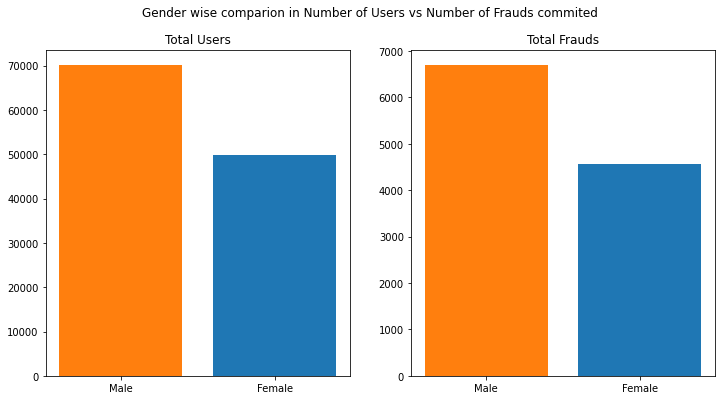

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle('Gender wise comparion in Number of Users vs Number of Frauds commited')
ax1.bar(df['sex'].value_counts().index,df['sex'].value_counts().values,color=['tab:orange','tab:blue'])
ax1.set_title('Total Users')
ax1.set_xticklabels(['Male','Female'])
ax2.bar(df['sex'].value_counts().index,fraud_commited,color=['tab:orange','tab:blue'])
ax2.set_title('Total Frauds')
ax2.set_xticklabels(['Male','Female'])
plt.show()

Now, let's analyze the relation of age of the user and frauds commited

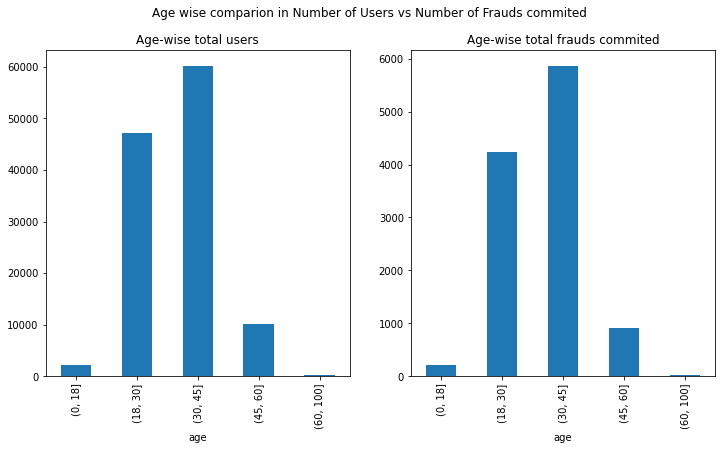

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle('Age wise comparion in Number of Users vs Number of Frauds commited')
bins=[0,18,30,45,60,100]
temp_df = df.groupby(pd.cut(df['age'], bins=bins)).age.count()
temp_df.plot(kind='bar',ax=ax1)
ax1.set_title('Age-wise total users')
temp_df = df[df['class']==1].groupby(pd.cut(df[df['class']==1]['age'],bins)).age.count()
temp_df.plot(kind='bar',ax=ax2)
ax2.set_title('Age-wise total frauds commited')
plt.show()

Here, we can see that most number of frauds are commited by someone aged between 30 and 45. Also, the reason behind that is that the number of users in that age bracket is maximum. Also, the distribution remains constant. 

In [18]:
df['source'].value_counts()

SEO       48297
Ads       47461
Direct    24242
Name: source, dtype: int64

In [19]:
fraud_commited = [len(df[(df['source']=='SEO') & (df['class']==1)]),
                  len(df[(df['source']=='Ads') & (df['class']==1)]),
                 len(df[(df['source']=='Direct') & (df['class']==1)])]

C:\Users\madha\AppData\Local\Temp/ipykernel_9008/245099088.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['SEO','Ads','Direct'])
C:\Users\madha\AppData\Local\Temp/ipykernel_9008/245099088.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['SEO','Ads','Direct'])


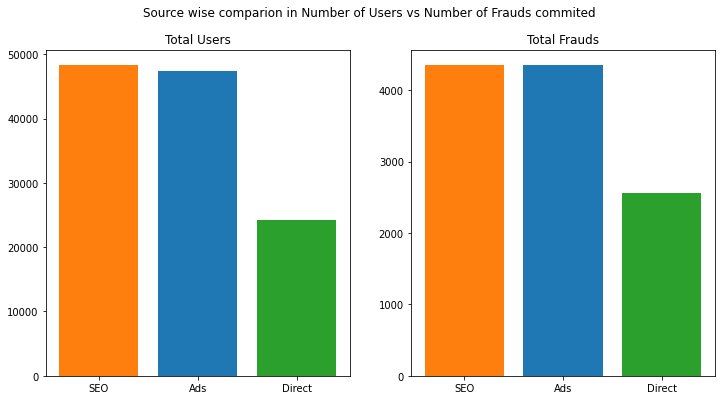

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle('Source wise comparion in Number of Users vs Number of Frauds commited')
ax1.bar(df['source'].value_counts().index,df['source'].value_counts().values,color=['tab:orange','tab:blue','tab:green'])
ax1.set_title('Total Users')
ax1.set_xticklabels(['SEO','Ads','Direct'])
ax2.bar(df['source'].value_counts().index,fraud_commited,color=['tab:orange','tab:blue','tab:green'])
ax2.set_title('Total Frauds')
ax2.set_xticklabels(['SEO','Ads','Direct'])
plt.show()

Above, the distribution is almost similar but Users who directly come to the website tend to commit more frauds than compared to total users who visit the site directly. But it is not significant. 

In [21]:
df['browser'].value_counts()

Chrome     48652
IE         29138
Safari     19620
FireFox    19615
Opera       2975
Name: browser, dtype: int64

In [22]:
fraud_commited = [len(df[(df['browser']=='Chrome') & (df['class']==1)]),
                  len(df[(df['browser']=='IE') & (df['class']==1)]),
                 len(df[(df['browser']=='Safari') & (df['class']==1)]),
                 len(df[(df['browser']=='FireFox') & (df['class']==1)]),
                 len(df[(df['browser']=='Opera') & (df['class']==1)])]

C:\Users\madha\AppData\Local\Temp/ipykernel_9008/2210570646.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Chrome','IE','Safari','FireFox','Opera'])
C:\Users\madha\AppData\Local\Temp/ipykernel_9008/2210570646.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Chrome','IE','Safari','FireFox','Opera'])


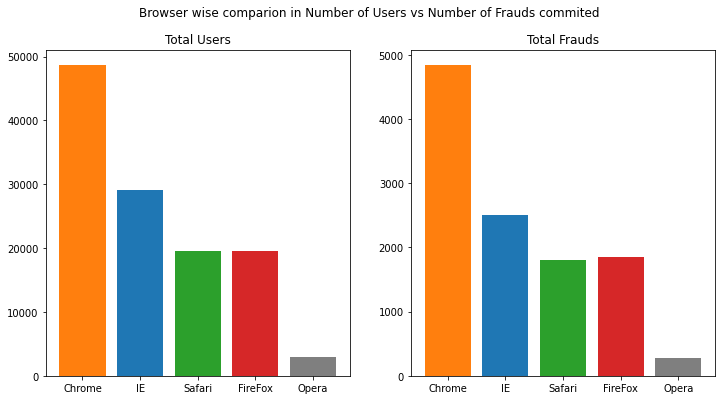

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle('Browser wise comparion in Number of Users vs Number of Frauds commited')
ax1.bar(df['browser'].value_counts().index,df['browser'].value_counts().values,color=['tab:orange','tab:blue','tab:green','tab:red','tab:gray'])
ax1.set_title('Total Users')
ax1.set_xticklabels(['Chrome','IE','Safari','FireFox','Opera'])
ax2.bar(df['browser'].value_counts().index,fraud_commited,color=['tab:orange','tab:blue','tab:green','tab:red','tab:gray'])
ax2.set_title('Total Frauds')
ax2.set_xticklabels(['Chrome','IE','Safari','FireFox','Opera'])
plt.show()

We can depict from above that chrome is most used browser by users and hence, most used browser when committing fraud.

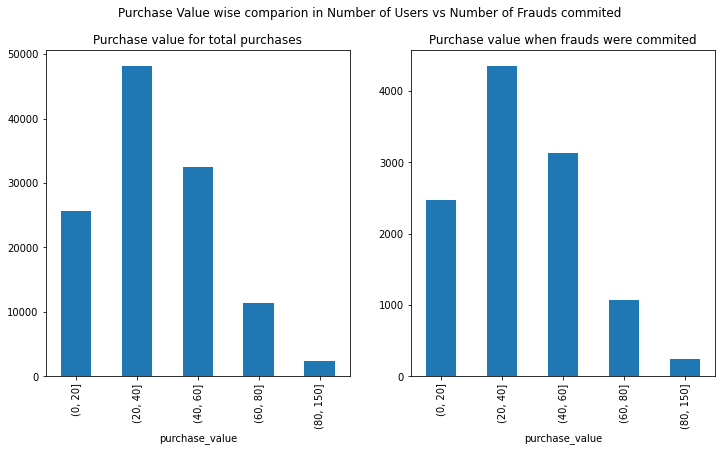

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle('Purchase Value wise comparion in Number of Users vs Number of Frauds commited')
bins=[0,20,40,60,80,150]
temp_df = df.groupby(pd.cut(df['purchase_value'], bins=bins)).purchase_value.count()
temp_df.plot(kind='bar',ax=ax1)
ax1.set_title('Purchase value for total purchases')
temp_df = df[df['class']==1].groupby(pd.cut(df[df['class']==1]['purchase_value'],bins)).purchase_value.count()
temp_df.plot(kind='bar',ax=ax2)
ax2.set_title('Purchase value when frauds were commited')
plt.show()

Here as well, the distribution is quite similar. More purchases are cheaper and not a lot of money is spent when fraud takes place.

Now, to analyze the date or time, we need to convert the `purchase_date` and `signup_date` into something more meaningful.

In [25]:
df[['signup_date','signup_time']] = df['signup_time'].str.split(' ',1,expand=True)
df[['purchase_date','purchase_time']] = df['purchase_time'].str.split(' ',1,expand=True)

df['signup_date'] = pd.to_datetime(df['signup_date'], format='%m/%d/%Y')
df['purchase_date'] = pd.to_datetime(df['purchase_date'],format='%m/%d/%Y')

df['signup_hour'] = pd.to_datetime(df['signup_time'],format='%H:%M').dt.hour
df['purchase_hour'] = pd.to_datetime(df['purchase_time'],format='%H:%M').dt.hour

df['signup_dayoftheweek'] = df['signup_date'].dt.dayofweek
df['purchase_dayoftheweek'] = df['purchase_date'].dt.dayofweek

df['signup_day_of_the_month'] = pd.to_datetime(df['signup_date'], format='%d').dt.day
df['purchase_day_of_the_month'] = pd.to_datetime(df['purchase_date'],format='%d').dt.day

df['signup_month'] = pd.to_datetime(df['signup_date'], format='%m').dt.month
df['purchase_month'] = pd.to_datetime(df['purchase_date'],format='%m').dt.month

df['elapsed_time_weeks'] = (df['purchase_date']- df['signup_date']).dt.days//7
df.drop(['signup_time','purchase_time'],axis=1,inplace=True)

In [26]:
df.head()

,user_id,elapsed_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,signup_date,purchase_date,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks
0,285108,2,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States,2015-07-15,2015-09-10,4,14,2,3,15,10,7,9,8
1,131009,3,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom,2015-01-24,2015-04-13,12,4,5,0,24,13,1,4,11
2,328855,1,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States,2015-03-11,2015-04-05,0,12,2,6,11,5,3,4,3
3,229053,0,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of,2015-01-07,2015-01-09,13,10,2,4,7,9,1,1,0
4,108439,2,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil,2015-02-08,2015-04-09,21,14,6,3,8,9,2,4,8


In [27]:
arr = df['purchase_hour']

In [28]:
# for i in range(len(df['purchase_hour'].value_counts())):
#     print(df['purchase_hour'].value_counts().index[i],len(df[(df['purchase_hour']==df['purchase_hour'].value_counts().index[i]) & df['class']==1]))

C:\Users\madha\AppData\Local\Temp/ipykernel_9008/2602610363.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


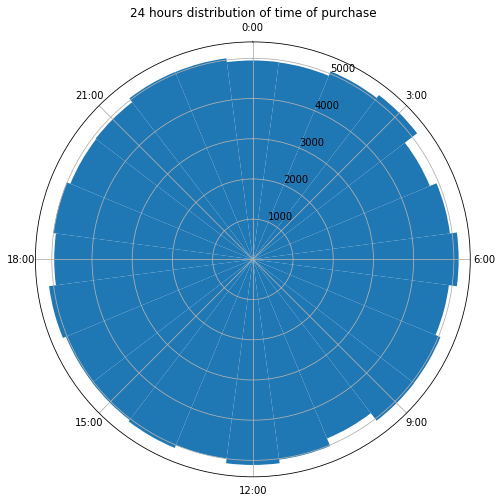

In [29]:
N = 24
bottom = 2

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(arr, bins = 24)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (12, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)
ax.set_title('24 hours distribution of time of purchase')
plt.show()
#code referenced:http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

In [30]:
arr = df[df['class']==1]['purchase_hour']

C:\Users\madha\AppData\Local\Temp/ipykernel_9008/3229585163.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


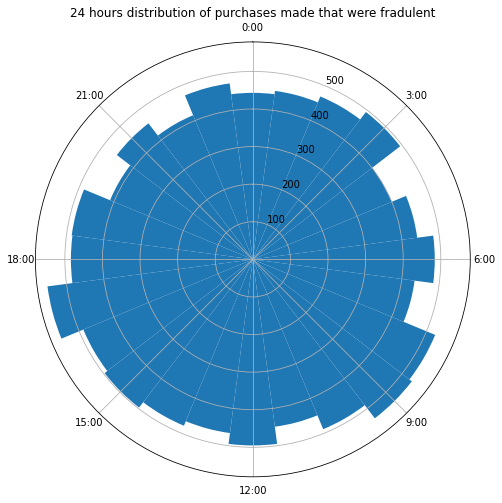

In [31]:
N = 24
bottom = 2

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(arr, bins = 24)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (12, 8))
ax = plt.subplot(111, polar=True,)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)
ax.set_title('24 hours distribution of purchases made that were fradulent')
plt.show()
#code referenced:http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

Above, we can see that most fradulent purchases are made at around 9 am and at 5 pm.  

In [32]:
arr = df['signup_hour']

C:\Users\madha\AppData\Local\Temp/ipykernel_9008/3937300806.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


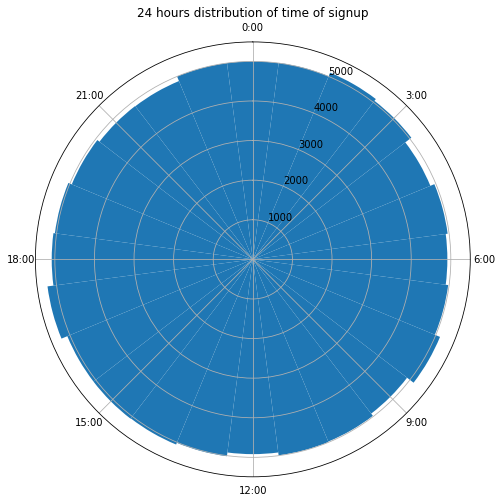

In [33]:
N = 24
bottom = 2

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(arr, bins = 24)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (12, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)
ax.set_title('24 hours distribution of time of signup')
plt.show()
#code referenced:http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

In [34]:
arr = df[df['class']==1]['signup_hour']

C:\Users\madha\AppData\Local\Temp/ipykernel_9008/1226839425.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


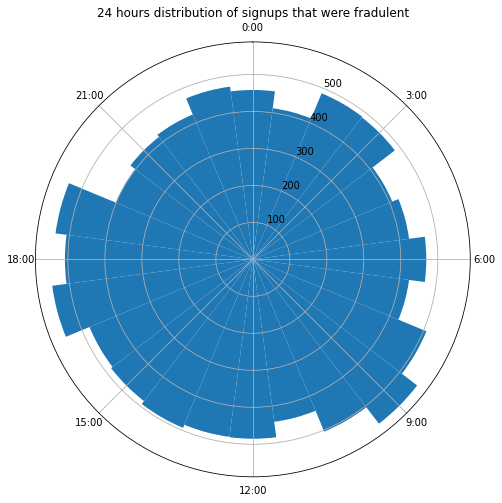

In [35]:
N = 24
bottom = 2

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(arr, bins = 24)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (12, 8))
ax = plt.subplot(111, polar=True,)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)
ax.set_title('24 hours distribution of signups that were fradulent')
plt.show()
#code referenced:http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html

Here, we can see that fraudulent signups are made at 9 am and 5 pm. Similar trend is seen in purchase time.

In [36]:
df.head()

,user_id,elapsed_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,signup_date,purchase_date,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks
0,285108,2,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States,2015-07-15,2015-09-10,4,14,2,3,15,10,7,9,8
1,131009,3,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom,2015-01-24,2015-04-13,12,4,5,0,24,13,1,4,11
2,328855,1,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States,2015-03-11,2015-04-05,0,12,2,6,11,5,3,4,3
3,229053,0,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of,2015-01-07,2015-01-09,13,10,2,4,7,9,1,1,0
4,108439,2,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil,2015-02-08,2015-04-09,21,14,6,3,8,9,2,4,8


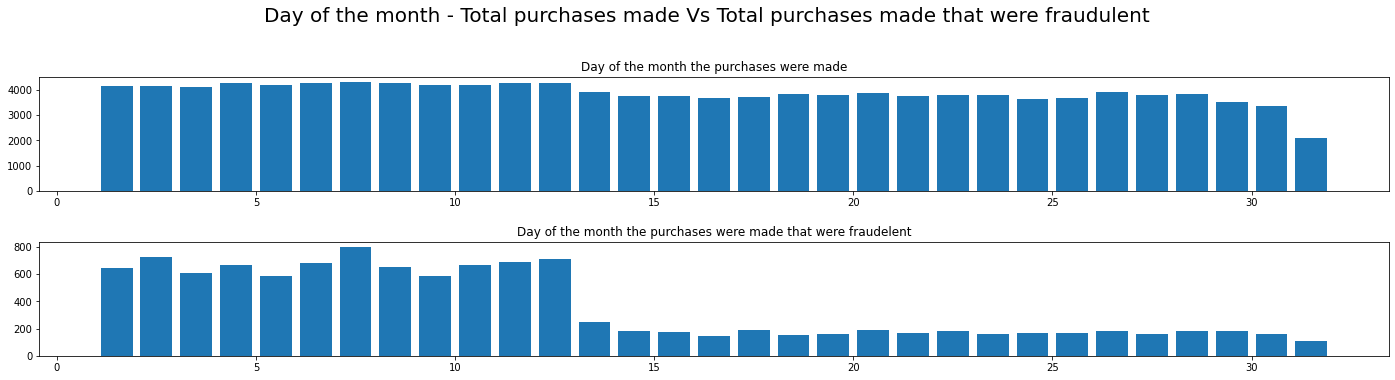

In [37]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,5))
fig.tight_layout(pad=3.0)
fig.suptitle('Day of the month - Total purchases made Vs Total purchases made that were fraudulent',y=1.1,fontsize=20)
ax1.hist(df['purchase_day_of_the_month'],bins=np.arange(1,33),rwidth=0.8)
ax1.set_title('Day of the month the purchases were made')
ax2.hist(df[df['class']==1]['purchase_day_of_the_month'],bins=np.arange(1,33),rwidth=0.8)
ax2.set_title('Day of the month the purchases were made that were fraudelent')
plt.show()

Surprisingly, we have extremey low number of fraudulent purchases in the end of the month.

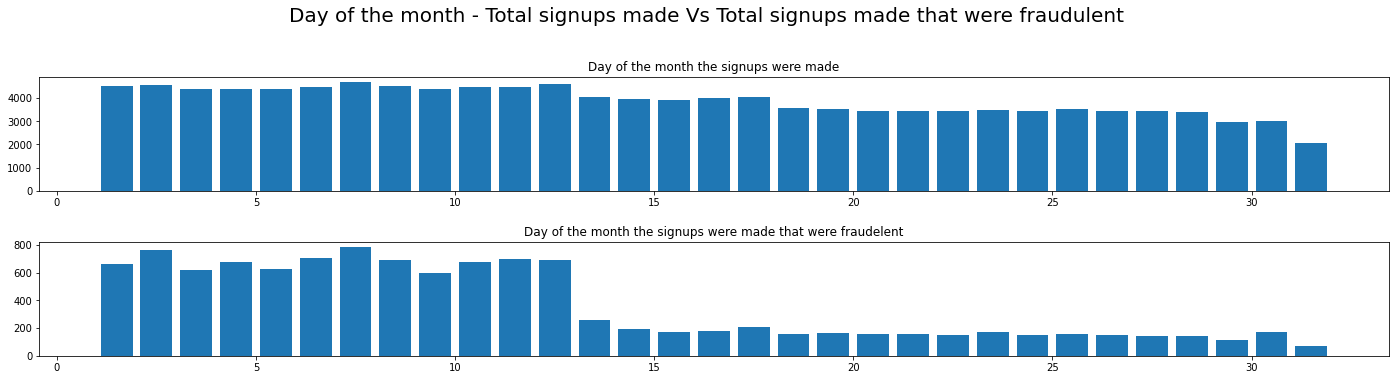

In [38]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,5))
fig.tight_layout(pad=3.0)
fig.suptitle('Day of the month - Total signups made Vs Total signups made that were fraudulent',y=1.1,fontsize=20)
ax1.hist(df['signup_day_of_the_month'],bins=np.arange(1,33),rwidth=0.8)
ax1.set_title('Day of the month the signups were made')
ax2.hist(df[df['class']==1]['signup_day_of_the_month'],bins=np.arange(1,33),rwidth=0.8)
ax2.set_title('Day of the month the signups were made that were fraudelent')
plt.show()

Similar trend as purchase date can be seen in signup as well.

In [39]:
df[df['class']==1]['elapsed_time'].value_counts()

0    6698
2    1331
1    1325
3    1323
4     588
Name: elapsed_time, dtype: int64

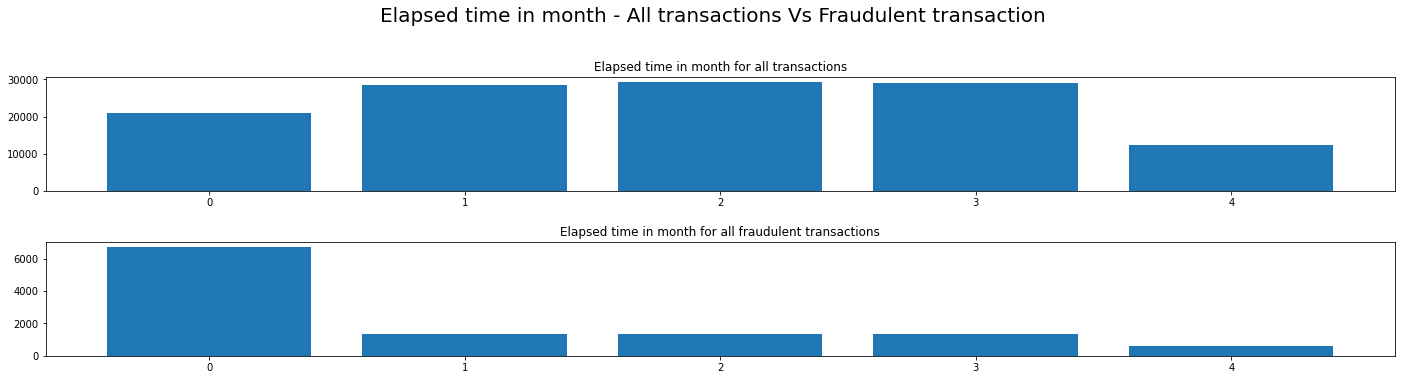

In [40]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,5))
fig.tight_layout(pad=3.0)
fig.suptitle('Elapsed time in month - All transactions Vs Fraudulent transaction',y=1.1,fontsize=20)
ax1.hist(df['elapsed_time'],bins=np.arange(-0.5,5.5),rwidth=0.8)
ax1.set_title('Elapsed time in month for all transactions')
ax2.hist(df[df['class']==1]['elapsed_time'],bins=np.arange(-0.5,5.5),rwidth=0.8)
ax2.set_title('Elapsed time in month for all fraudulent transactions')
plt.show()

Here, it is obvious that most fraudulent transactions occur within 30 days of signing up. Thus, this can be an important feature for us.

Now, this is enough for EDA. Let's now move on to feature selection where we would use the knowledge gained during this process.

## Feature Selection

Here, we first drop the `user_id` column as we don't really get any insight from it. Moreover, as the dataset has the first transaction of the user so we are only going to have one record per user. Also, we can see below that one user_id is used only once. 

In [41]:
max(df['user_id'].value_counts())

1

In [42]:
df.drop(['user_id'],axis=1,inplace=True)

In [43]:
df.head()

,elapsed_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,signup_date,purchase_date,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks
0,2,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States,2015-07-15,2015-09-10,4,14,2,3,15,10,7,9,8
1,3,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom,2015-01-24,2015-04-13,12,4,5,0,24,13,1,4,11
2,1,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States,2015-03-11,2015-04-05,0,12,2,6,11,5,3,4,3
3,0,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of,2015-01-07,2015-01-09,13,10,2,4,7,9,1,1,0
4,2,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil,2015-02-08,2015-04-09,21,14,6,3,8,9,2,4,8


Now, let's try to convert categorical variable into something that we can use for our classification model.

First, let's try to anaylze the country:

In [44]:
print("Total countries: {0}".format(len(df['country'].value_counts())))

Total countries: 177


Also, let's analyze the country-wise frauds

In [45]:
country_list = df['country'].value_counts()

In [46]:
frauds_ratio = []
for i in range(len(country_list)):
    frauds = len([1 for j in range(len(df)) if df.loc[j,'country']==country_list.index[i] and df.loc[j,'class']==1])
    total_users_in_country = country_list[i]
    frauds_ratio.append(round(frauds/total_users_in_country,5))
    if i < 70:
        print('Country : {:40s} Total Users {:4d} \t Frauds Ratio:{}'.format(country_list.index[i],total_users_in_country,round(frauds/total_users_in_country,5)))

Country : United States                            Total Users 46184 	 Frauds Ratio:0.09683
Country : Unknown                                  Total Users 17418 	 Frauds Ratio:0.08514
Country : China                                    Total Users 9532 	 Frauds Ratio:0.08571
Country : Japan                                    Total Users 5735 	 Frauds Ratio:0.0966
Country : United Kingdom                           Total Users 3580 	 Frauds Ratio:0.10391
Country : Korea Republic of                        Total Users 3341 	 Frauds Ratio:0.09159
Country : Germany                                  Total Users 2890 	 Frauds Ratio:0.07301
Country : France                                   Total Users 2489 	 Frauds Ratio:0.09361
Country : Brazil                                   Total Users 2353 	 Frauds Ratio:0.09265
Country : Canada                                   Total Users 2344 	 Frauds Ratio:0.11519
Country : Italy                                    Total Users 1564 	 Frauds Ratio:0.0850

Here, we have a choice to make: <br>
1) We can either drop the `country` columns as ratio of (Number of Frauds/Number of Users) is almost similar in most cases, and this way we won't be losing much of the information<br>
2) We use one-hot encoding/hashing and convert this categorical variable which we can use in our model training

Though, before dropping the column, we need to note that some countries like Saudi Arabia, Sri Lanka and other middle eastern countries have higher fraud ratio compared to other countries.

Let's apply one-hot encoding to it and try to analyze it's importance. 

In [47]:
df[df['class']==1]['country'].value_counts()

United States            4472
Unknown                  1483
China                     817
Japan                     554
United Kingdom            372
                         ... 
Angola                      1
Serbia                      1
Virgin Islands (U.S.)       1
Iceland                     1
Guatemala                   1
Name: country, Length: 107, dtype: int64

Here, we have Unknown country as the second highest cases of fraud cases reported. We have another decision to make here. <br>
1) Do we drop the rows with Unknown country?<br>
2) Do we use in hashing?<br>
Considering that we will have limited data left if we drop the rows with Unknown country name, we can't choose that option. In many cases, since we are getting the Country name from the IP address, the chances are that IP would be difficult to track. So let's just continue with considering Unknown as just another value. 

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [49]:
X = df.loc[:, df.columns != 'class']
y = df.loc[:,'class']

In [50]:
one_hot = pd.get_dummies(X[['country','source','browser','sex']])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(one_hot, y, test_size=0.33, random_state=1)

In [52]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [53]:
selected_feat= one_hot.columns[(sel.get_support())]
len(selected_feat)

56

In [54]:
for i in range(len(one_hot.columns)):
    one_hot.columns.values[i] = one_hot.columns.values[i].split('_')[1]

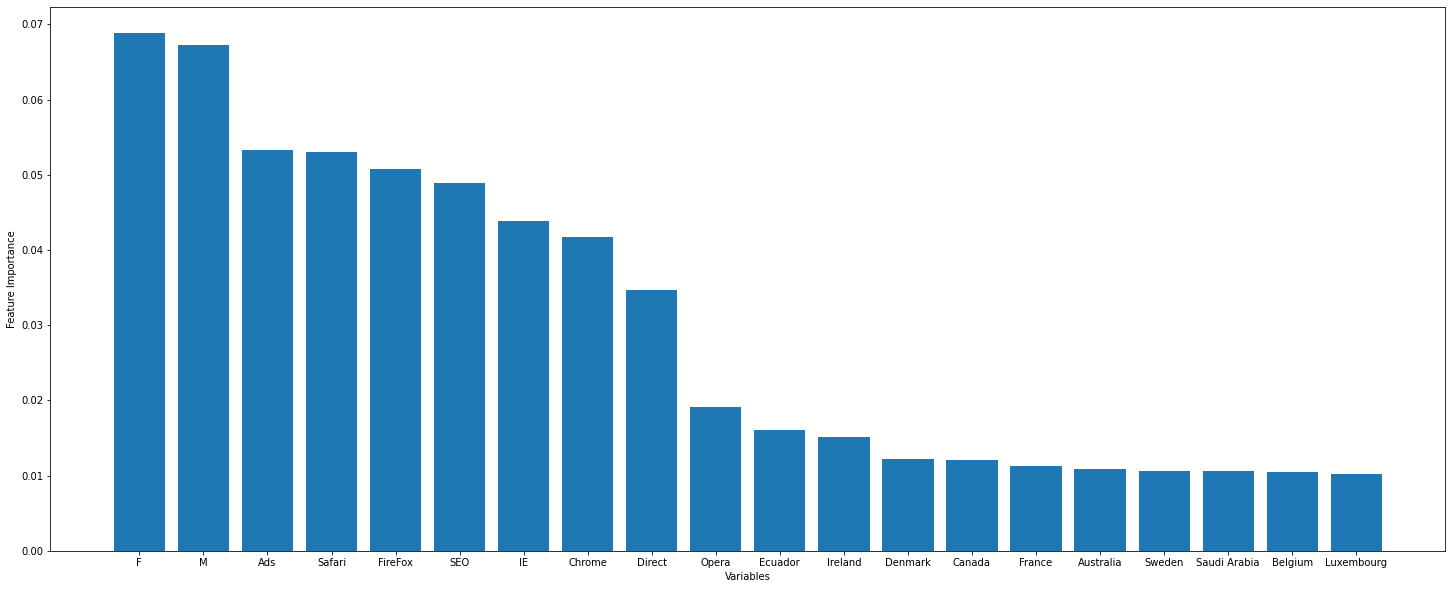

In [55]:
plt.figure(figsize=(25,10))
plt.bar(X_train.columns[np.array(sel.estimator_.feature_importances_).argsort()[::-1][:20]],np.sort(np.array(sel.estimator_.feature_importances_))[::-1][:20])
plt.ylabel('Feature Importance')
plt.xlabel('Variables')
plt.show()

Above, we can analyze that countries with higher ration of frauds have higher feature importance. Countries like Ireland, Ecuador, Luxembourg, etc have higher ratio compared to other countries so they are more relevent.

So In my opinion, we should keep the `Country` column since we are making a generalized model which would have users from all countries.
#### We have to keep in mind that columns with high cardinality can cause tree-based algorithms some trouble. So let's try to come up with a way we can keep the `Country` column and deal with the cardinality issue faced in RandomForest.

Since we are using RandomForest, we can use **Boruta** as well for feature importance, but since we are not going to use any other library other than Scikit-learn, we are going to rely on results we got above.

Let's try Hashing now.

###  Hashing

In [56]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10, input_type='string')
f = h.transform(X['country'])

In [57]:
df_hashing = pd.DataFrame(f.toarray(),columns=['1','2','3','4','5','6','7','8','9','10'])

In [58]:
one_hot = pd.get_dummies(X[['source','browser','sex']])

In [59]:
df_hashing = pd.concat([df_hashing,one_hot],axis=1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df_hashing, y, test_size=0.33, random_state=1)

In [61]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [62]:
for i in range(len(df_hashing.columns)):
    if len(df_hashing.columns.values[i].split('_'))!=1:
        df_hashing.columns.values[i] = df_hashing.columns.values[i].split('_')[1]

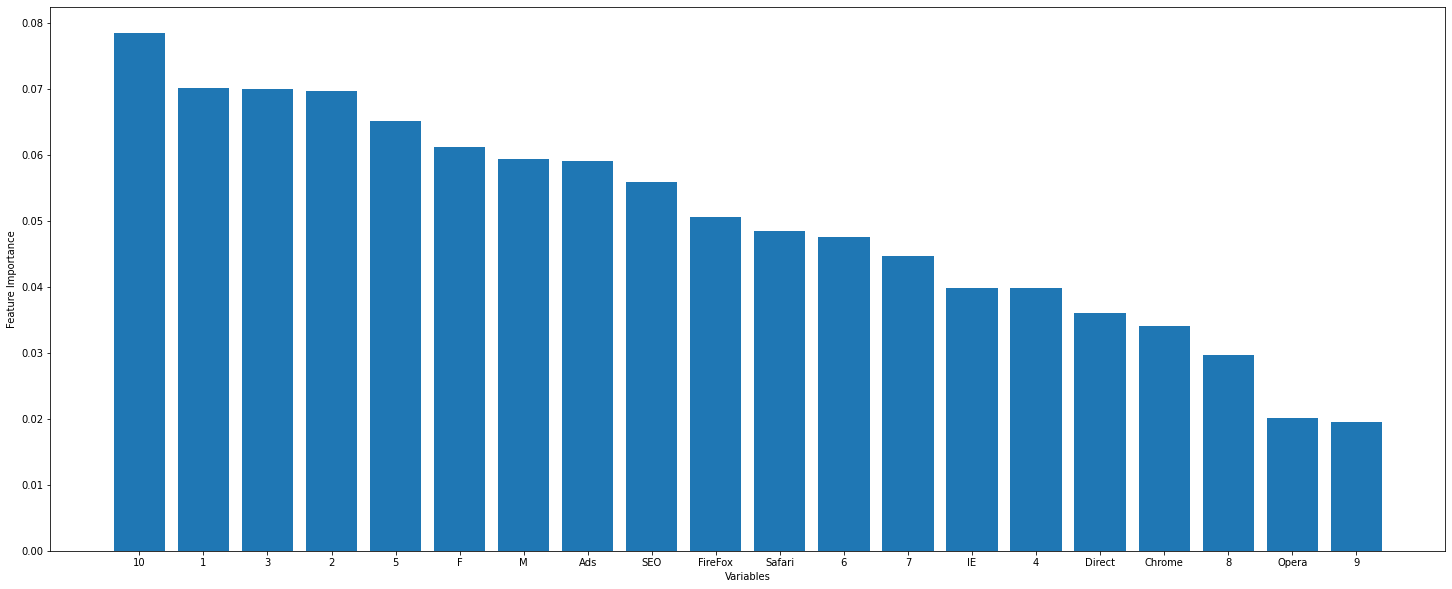

In [63]:
plt.figure(figsize=(25,10))
plt.bar(X_train.columns[np.array(sel.estimator_.feature_importances_).argsort()[::-1][:20]],np.sort(np.array(sel.estimator_.feature_importances_))[::-1][:20])
plt.ylabel('Feature Importance')
plt.xlabel('Variables')
plt.show()

Here, we can see that hashed variables have more feature importance than some other variables. We can use this transformed categorical transformation.

Let's drop the `country` column and replace it with hashed variables, and replace `sex`,`source` and `browser` with one-hot encoded features.

Now that we know hashing can be useful, we can use it along with other features to compare.

Let's split the data in to train and test and start preparing our features.

In [64]:
df.head()

,elapsed_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,signup_date,purchase_date,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks
0,2,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States,2015-07-15,2015-09-10,4,14,2,3,15,10,7,9,8
1,3,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom,2015-01-24,2015-04-13,12,4,5,0,24,13,1,4,11
2,1,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States,2015-03-11,2015-04-05,0,12,2,6,11,5,3,4,3
3,0,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of,2015-01-07,2015-01-09,13,10,2,4,7,9,1,1,0
4,2,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil,2015-02-08,2015-04-09,21,14,6,3,8,9,2,4,8


In [65]:
X = df.loc[:, df.columns != 'class']
y = df.loc[:,'class']

In [66]:
one_hot = pd.get_dummies(X[['source','browser','sex']])

In [67]:
X = pd.concat([X,one_hot],axis=1)

In [68]:
X.drop(['source','browser','sex'],axis=1,inplace=True)

In [69]:
X.drop(['signup_date','purchase_date'],axis=1,inplace=True)

In [70]:
X

,elapsed_time,purchase_value,device_id,age,ip_address,country,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
0,2,31,HZAKVUFTDOSFD,49,2.818400e+09,United States,4,14,2,3,15,10,7,9,8,0,1,0,1,0,0,0,0,0,1
1,3,31,XGQAJSOUJIZCC,21,3.251268e+09,United Kingdom,12,4,5,0,24,13,1,4,11,0,0,1,0,0,1,0,0,1,0
2,1,16,VCCTAYDCWKZIY,26,2.727760e+09,United States,0,12,2,6,11,5,3,4,3,0,1,0,0,0,1,0,0,0,1
3,0,29,MFFIHYNXCJLEY,34,2.083420e+09,Korea Republic of,13,10,2,4,7,9,1,1,0,0,0,1,1,0,0,0,0,0,1
4,2,26,WMSXWGVPNIFBM,33,3.207913e+09,Brazil,21,14,6,3,8,9,2,4,8,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,2,46,UJYRDGZXTFFJG,18,2.509395e+09,Netherlands,11,22,3,3,26,16,2,4,7,1,0,0,1,0,0,0,0,0,1
119996,0,26,EMMTCPTUYQYPX,36,2.946612e+09,China,18,7,5,1,1,25,8,8,3,1,0,0,0,0,1,0,0,1,0
119997,2,41,YSZGGEARGETEU,31,5.570629e+08,United States,12,4,5,3,25,3,7,9,5,0,0,1,1,0,0,0,0,0,1
119998,2,50,BJDWRJULJZNOV,43,2.687887e+09,Switzerland,21,16,3,0,2,22,4,6,11,0,0,1,1,0,0,0,0,1,0


In [71]:
X_train_temp, X_test_temp, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1,stratify=y)

#### Now, let's analyze the `device_id` and `ip_address` next.

In [72]:
ip_address_value_count = X_train_temp['ip_address'].value_counts()
ip_address_value_count

3.874758e+09    18
2.979623e+09    14
1.797069e+09    14
2.050964e+09    13
2.470359e+09    13
                ..
2.241803e+09     1
1.485240e+09     1
4.017842e+09     1
2.177170e+09     1
2.382439e+09     1
Name: ip_address, Length: 76746, dtype: int64

In [73]:
X_train_temp[X_train_temp['ip_address']==X_train_temp['ip_address'].value_counts().index[0]]

,elapsed_time,purchase_value,device_id,age,ip_address,country,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
77249,3,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,0,5,1,10,28,1,4,15,1,0,0,0,0,0,0,1,0,1
6064,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
75401,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
97601,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
27019,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
18867,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
92593,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
10680,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
119869,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
95591,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1


Here, we can see that there is unknown country as well. We can see if we can do something to solve that.

Table above shows that the possibility of fraud is maximum when `ip_address` is used before. We need to convert it so that we can effectively use it to train our model. 

First, let's create a dicionary to check the number of times the particular IP Address is used. We would need this dictionary to track the amount of time in the test data as well.

In [74]:
ip_address_used = {}

In [75]:
X_train_temp.reset_index(drop=True,inplace=True)

In [76]:
X_train = X_train_temp.copy()

In [77]:
def assign_count_ip_address(dataframe,ip_address_used):
    for i in range(len(dataframe)):
        if dataframe.loc[i,'ip_address'] in ip_address_used.keys():            
            ip_address_used[dataframe.loc[i,'ip_address']] += 1
        else:
            ip_address_used[dataframe.loc[i,'ip_address']] = 1
    return ip_address_used

In [78]:
ip_address_used = assign_count_ip_address(X_train_temp,ip_address_used)

In [79]:
X_train.loc[:,'Number_of_times_IP_used_before'] = [ip_address_used[i] for i in X_train_temp['ip_address']]

In [80]:
X_test_temp.reset_index(drop=True,inplace=True)

In [81]:
X_test = X_test_temp.copy()

In [82]:
ip_address_used = assign_count_ip_address(X_test,ip_address_used)

In [83]:
X_test.loc[:,'Number_of_times_IP_used_before'] = [ip_address_used[i] for i in X_test['ip_address']]

#### Now, let's analyze the `device_id`.

In [84]:
device_id_value_count = X_train_temp['device_id'].value_counts()
device_id_value_count

ITUMJCKWEYNDD    18
EQYVNEGOFLAWK    14
FVYSKVOAMYIZM    14
UFBULQADXSSOG    13
NGQCKIADMZORL    13
                 ..
BOWAMGNCBBLSJ     1
EJMIHXCLRZSQI     1
JQBPZZWPYICGK     1
NGQCVRMWNLPYI     1
HFKIWCYJGWOVZ     1
Name: device_id, Length: 75172, dtype: int64

In [85]:
X_train_temp[X_train_temp['device_id']==X_train_temp['device_id'].value_counts().index[0]]

,elapsed_time,purchase_value,device_id,age,ip_address,country,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M
6121,3,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,0,5,1,10,28,1,4,15,1,0,0,0,0,0,0,1,0,1
11091,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
15558,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
24665,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
25212,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
29375,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
32203,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
32362,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
34410,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1
37124,0,38,ITUMJCKWEYNDD,43,3.874758e+09,Unknown,23,23,5,5,10,10,1,1,0,1,0,0,0,0,0,0,1,0,1


#### Similar is same for `device_id` as devices used multiple times have higher possibility of being fraudulent

In [86]:
device_id_used = {}

In [87]:
def assign_count_device_id(dataframe,device_id_used):
    for i in range(len(dataframe)):
        if dataframe.loc[i,'device_id'] in device_id_used.keys():            
            device_id_used[dataframe.loc[i,'device_id']] += 1
        else:
            device_id_used[dataframe.loc[i,'device_id']] = 1
    return device_id_used

In [88]:
device_id_used = assign_count_device_id(X_train_temp,device_id_used)

In [89]:
X_train.loc[:,'Number_of_times_device_ID_used_before'] = [device_id_used[i] for i in X_train_temp['device_id']]

In [90]:
X_train.drop(['device_id','ip_address'],axis=1,inplace=True)

In [91]:
device_id_used = assign_count_device_id(X_test_temp,device_id_used)
X_test.loc[:,'Number_of_times_device_ID_used_before'] = [device_id_used[i] for i in X_test_temp['device_id']]
X_test.drop(['device_id','ip_address'],axis=1,inplace=True)

In [92]:
X_train.head()

,elapsed_time,purchase_value,age,country,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,Number_of_times_IP_used_before,Number_of_times_device_ID_used_before
0,1,26,35,United States,11,11,2,5,1,29,7,8,8,1,0,0,1,0,0,0,0,0,1,1,1
1,2,30,35,Unknown,16,23,2,5,8,19,7,9,10,1,0,0,1,0,0,0,0,0,1,1,1
2,2,21,23,United States,5,0,6,5,1,9,3,5,9,1,0,0,1,0,0,0,0,1,0,1,1
3,3,94,30,Sweden,9,17,3,1,28,25,5,8,12,0,1,0,0,0,1,0,0,1,0,1,1
4,0,59,33,Korea Republic of,21,21,5,5,10,10,1,1,0,1,0,0,0,1,0,0,0,0,1,9,9


#### Hashing on training dataset

In [93]:
h = FeatureHasher(n_features=10, input_type='string')
f = h.transform(X_train['country'])

In [94]:
df_hashing = pd.DataFrame(f.toarray(),columns=['country_1','country_2','country_3','country_4','country_5','country_6','country_7',
                                               'country_8','country_9','country_10'])

In [95]:
X_train = pd.concat([X_train,df_hashing],axis=1)

In [96]:
X_train.drop(['country'],axis=1,inplace=True)

In [97]:
X_train.head()

,elapsed_time,purchase_value,age,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,Number_of_times_IP_used_before,Number_of_times_device_ID_used_before,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10
0,1,26,35,11,11,2,5,1,29,7,8,8,1,0,0,1,0,0,0,0,0,1,1,1,0.0,-1.0,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0
1,2,30,35,16,23,2,5,8,19,7,9,10,1,0,0,1,0,0,0,0,0,1,1,1,-1.0,-2.0,0.0,1.0,-3.0,0.0,0.0,0.0,0.0,0.0
2,2,21,23,5,0,6,5,1,9,3,5,9,1,0,0,1,0,0,0,0,1,0,1,1,0.0,-1.0,1.0,0.0,-1.0,0.0,0.0,0.0,-1.0,-1.0
3,3,94,30,9,17,3,1,28,25,5,8,12,0,1,0,0,0,1,0,0,1,0,1,1,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,3.0
4,0,59,33,21,21,5,5,10,10,1,1,0,1,0,0,0,1,0,0,0,0,1,9,9,0.0,-2.0,4.0,3.0,0.0,1.0,-1.0,-1.0,0.0,3.0


Now, this is the dataframe that we can use to compute feature importance

In [98]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

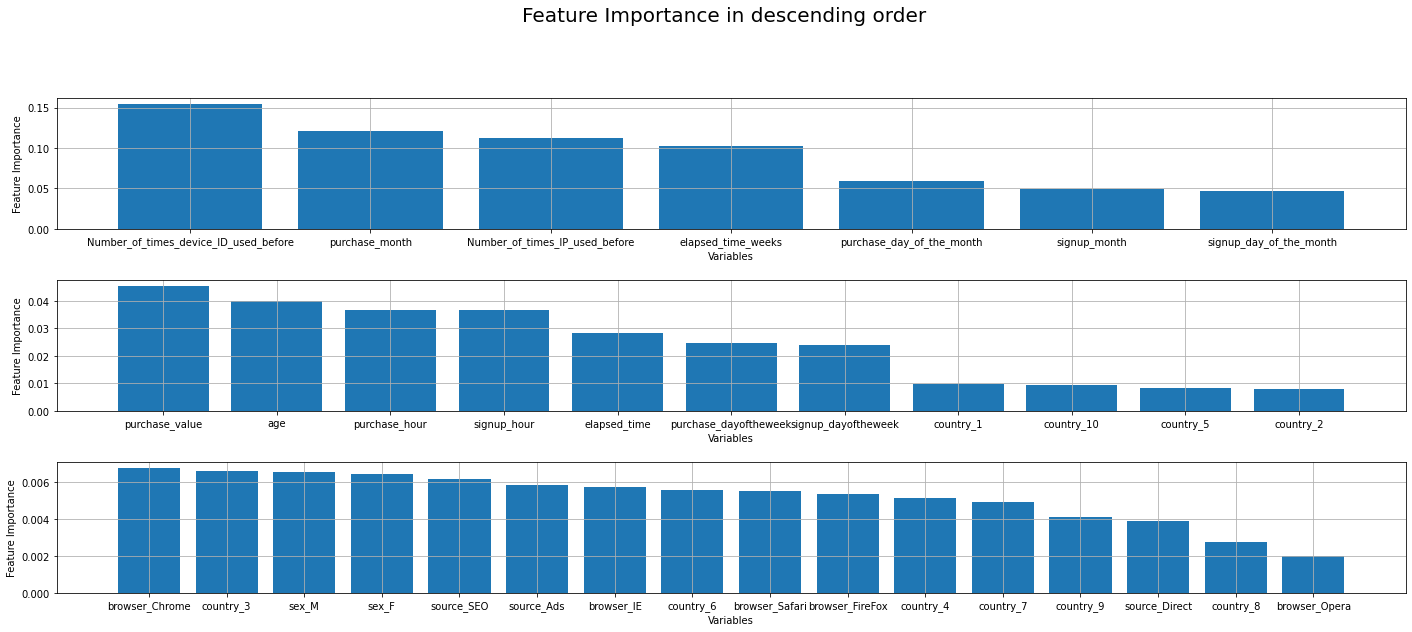

In [99]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,8))
fig.tight_layout(pad=3.0)
fig.suptitle('Feature Importance in descending order',y=1.1,fontsize=20)
ax1.bar(X_train.columns[np.array(sel.estimator_.feature_importances_).argsort()[::-1][:7]],np.sort(np.array(sel.estimator_.feature_importances_))[::-1][:7])
ax1.set_ylabel('Feature Importance')
ax1.set_xlabel('Variables')
ax1.grid()
ax2.bar(X_train.columns[np.array(sel.estimator_.feature_importances_).argsort()[::-1][7:18]],np.sort(np.array(sel.estimator_.feature_importances_))[::-1][7:18])
ax2.set_ylabel('Feature Importance')
ax2.set_xlabel('Variables')
ax2.grid()
ax3.bar(X_train.columns[np.array(sel.estimator_.feature_importances_).argsort()[::-1][18:]],np.sort(np.array(sel.estimator_.feature_importances_))[::-1][18:])
ax3.set_ylabel('Feature Importance')
ax3.set_xlabel('Variables')
ax3.grid()
plt.show()

As we can see, the added variables such as `Number_of_times_IP_used_before`, `Number_of_times_device_ID_used_before`, `purchase_month`,`elapsed_time_weeks`, etc have significantly higher feature importance. 

In [353]:
X_train.columns[np.array(sel.estimator_.feature_importances_).argsort()[::-1][:7]]

Index(['country_2', 'purchase_month', 'country_1', 'elapsed_time_weeks',
       'purchase_day_of_the_month', 'signup_month', 'signup_day_of_the_month'],
      dtype='object')

## Training the Model 

Let's prepare the test dataset

In [100]:
f = h.transform(X_test['country'])

In [101]:
df_hashing = pd.DataFrame(f.toarray(),columns=['country_1','country_2','country_3','country_4','country_5','country_6','country_7',
                                               'country_8','country_9','country_10'])

In [102]:
X_test = pd.concat([X_test,df_hashing],axis=1)
X_test.drop(['country'],axis=1,inplace=True)

Since our data is unbalanced, we can apply various over-sampling, undersampling methods to tackle this issue. But, since, we only have access to Sklearn, we would just stick with what we can achieve using sklearn. 

#### Let's try different base models first

#### Random Forest

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,precision_recall_curve,average_precision_score, accuracy_score
import pickle

In [104]:
rf = RandomForestClassifier(n_estimators=500)

In [159]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [106]:
y_hat = rf.predict(X_test)

In [107]:
y_hat

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [108]:
sum(y_test ==y_hat)/len(y_test)

0.9563888888888888

In [109]:
print(classification_report(y_test,y_hat,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.98     35883
     Class 1       0.99      0.54      0.70      3717

    accuracy                           0.96     39600
   macro avg       0.97      0.77      0.84     39600
weighted avg       0.96      0.96      0.95     39600



In [110]:
roc_auc_score(y_test,y_hat)

0.7702212375855105

Here, the results are quite decent but the recall is too low for our usecase as it costs us $8 for false positive but false negative can cost us much more than that so we need higher recall.

#### Gradient Boosting

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

In [112]:
gb = GradientBoostingClassifier()

In [113]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [114]:
y_hat = gb.predict(X_test)

In [115]:
print(classification_report(y_test,y_hat,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.98     35883
     Class 1       0.99      0.54      0.70      3717

    accuracy                           0.96     39600
   macro avg       0.97      0.77      0.84     39600
weighted avg       0.96      0.96      0.95     39600



In [116]:
roc_auc_score(y_test,y_hat)

0.7701515667107229

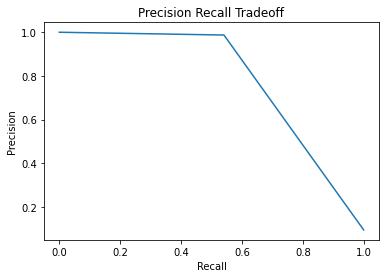

In [117]:
precision,recall,threshold = precision_recall_curve(y_test,y_hat)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show() 

Same thing can be said about above result. Recall we find is not good enough to use.

#### Random Forest

In [118]:
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('rf',RandomForestClassifier())
])

In [119]:
params = {
    'rf__n_estimators':[200,230],
    'rf__max_depth':[30,50],
    'rf__min_samples_split':[2,3],
    'rf__min_samples_leaf':[3,5],
    'rf__class_weight':[{0:1,1:1},{0:1,1:5},{0:1,1:3},'balanced']
}

In [120]:
# randomForest = GridSearchCV(pipeline,param_grid=params,scoring='roc_auc',cv=3)
# randomForest.fit(X_train,y_train)

In [121]:
filename = 'finalized_model.sav'
# pickle.dump(randomForest, open(filename, 'wb'))

In [458]:
# randomForest = pickle.load(open(filename, 'rb'))

In [123]:
y_hat = randomForest.predict(X_test)

c:\users\madha\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [124]:
y_prob = randomForest.predict_proba(X_test)

c:\users\madha\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [125]:
roc_auc_score(y_test,y_hat)

0.7702212375855105

In [126]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     35883
           1       0.99      0.54      0.70      3717

    accuracy                           0.96     39600
   macro avg       0.97      0.77      0.84     39600
weighted avg       0.96      0.96      0.95     39600



In [127]:
print(confusion_matrix(y_test,y_hat))

[[35862    21]
 [ 1706  2011]]


In [128]:
auprc = average_precision_score(y_test, y_hat)

In [129]:
auprc

0.5785171889145597

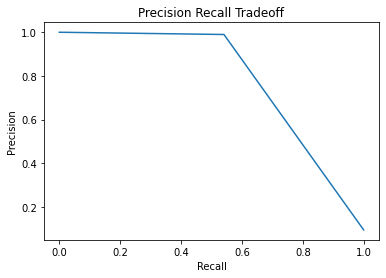

In [130]:
precision,recall,threshold = precision_recall_curve(y_test,y_hat)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show() 

In [131]:
y_result = []
for i in range(len(y_prob)):
    if int(X_test.loc[i,'purchase_value'])>8:#if the purchase value is more than 8, we lower the threshold
        if y_prob[i][1] > 0.1:
            y_result.append(1)
        else:
            y_result.append(0)
    else:
        if y_prob[i][1]>0.5:
            y_result.append(1)
        else:
            y_result.append(0)

In [132]:
roc_auc_score(y_test,y_result)

0.8124630432278594

In [133]:
average_precision_score(y_test, y_result)

0.3906567264911223

In [134]:
print(classification_report(y_test,y_result))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     35883
           1       0.52      0.69      0.60      3717

    accuracy                           0.91     39600
   macro avg       0.75      0.81      0.77     39600
weighted avg       0.93      0.91      0.92     39600



#### Now, let's try to balance the dataset using Upsampling and analyze the results 

In [138]:
from imblearn.over_sampling import SMOTE

In [139]:
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [140]:
X_smote

,elapsed_time,purchase_value,age,signup_hour,purchase_hour,signup_dayoftheweek,purchase_dayoftheweek,signup_day_of_the_month,purchase_day_of_the_month,signup_month,purchase_month,elapsed_time_weeks,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,Number_of_times_IP_used_before,Number_of_times_device_ID_used_before,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,country_10
0,1,26,35,11,11,2,5,1,29,7,8,8,1,0,0,1,0,0,0,0,0,1,1,1,0.000000,-1.000000,1.000000,0.0,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
1,2,30,35,16,23,2,5,8,19,7,9,10,1,0,0,1,0,0,0,0,0,1,1,1,-1.000000,-2.000000,0.000000,1.0,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,21,23,5,0,6,5,1,9,3,5,9,1,0,0,1,0,0,0,0,1,0,1,1,0.000000,-1.000000,1.000000,0.0,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
3,3,94,30,9,17,3,1,28,25,5,8,12,0,1,0,0,0,1,0,0,1,0,1,1,0.000000,-1.000000,0.000000,0.0,-1.000000,0.000000,0.000000,0.000000,-1.000000,3.000000
4,0,59,33,21,21,5,5,10,10,1,1,0,1,0,0,0,1,0,0,0,0,1,9,9,0.000000,-2.000000,4.000000,3.0,0.000000,1.000000,-1.000000,-1.000000,0.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145699,3,10,21,22,2,5,6,21,19,5,8,12,0,0,1,0,0,0,0,0,0,0,1,1,0.880625,-1.761249,-0.119375,0.0,-0.761249,-0.880625,-0.119375,0.119375,0.000000,-0.119375
145700,0,17,34,17,21,4,4,12,18,5,5,2,0,0,0,0,0,0,0,0,0,0,1,1,1.369177,-2.369177,0.000000,0.0,-1.000000,-0.630823,0.000000,0.000000,0.000000,-0.738353
145701,0,42,29,23,23,0,0,12,12,1,1,0,0,0,1,0,0,0,0,1,0,1,4,4,1.000000,0.000000,0.000000,0.0,-1.000000,1.000000,0.000000,-1.000000,-1.000000,1.000000
145702,1,36,27,11,4,0,1,4,17,1,2,6,0,0,0,0,0,0,0,0,0,0,1,1,0.356785,-0.643215,0.643215,0.0,-1.000000,0.356785,0.000000,-0.356785,-1.000000,-0.286430


Since, we are working with imbalanced dataset, let's try anomaly detection.

In [151]:
rf = RandomForestClassifier(n_estimators=200)

In [152]:
rf.fit(X_smote,y_smote)

RandomForestClassifier(n_estimators=200)

In [160]:
y_hat = rf.predict(X_test)

In [161]:
y_hat

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [162]:
sum(y_test ==y_hat)/len(y_test)

0.9563636363636364

In [163]:
print(classification_report(y_test,y_hat,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.95      1.00      0.98     35883
     Class 1       0.99      0.54      0.70      3717

    accuracy                           0.96     39600
   macro avg       0.97      0.77      0.84     39600
weighted avg       0.96      0.96      0.95     39600



In [164]:
roc_auc_score(y_test,y_hat)

0.770207303410553

#### Here, we can analyze that there was no significant change in result, so now let's move on to Anomaly detection.

In [176]:
from sklearn.ensemble import IsolationForest

In [231]:
f = h.transform(X['country'])

In [232]:
df_hashing = pd.DataFrame(f.toarray(),columns=['country_1','country_2','country_3','country_4','country_5','country_6','country_7',
                                               'country_8','country_9','country_10'])

In [233]:
X_temp = pd.concat([X,df_hashing],axis=1)
X_temp.drop(['country'],axis=1,inplace=True)


In [248]:
X_temp.drop(['device_id','ip_address'],axis=1,inplace=True)

In [249]:
outlier_fraction = y.value_counts()[1]/float(y.value_counts()[0])

In [250]:
outlier_fraction

0.10360049662022348

In [262]:
IF = IsolationForest(n_estimators=200, max_samples=len(X_temp), 
                                       contamination=outlier_fraction,random_state=42, verbose=0)

In [263]:
IF.fit(X_temp)

c:\users\madha\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.10360049662022348, max_samples=120000,
                n_estimators=200, random_state=42)

In [264]:
scores_prediction = IF.decision_function(X_temp)

In [265]:
y_pred = IF.predict(X_temp)

In [266]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

In [267]:
print(accuracy_score(y,y_pred))

0.819625


In [268]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90    108735
           1       0.08      0.09      0.09     11265

    accuracy                           0.82    120000
   macro avg       0.49      0.49      0.49    120000
weighted avg       0.83      0.82      0.82    120000



In [269]:
roc_auc_score(y,y_pred)

0.4930906673568456

Here, the results are not impressive as compared to Random Forest

#### Now, let's try to implement AutoEncoders

In [279]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [335]:
f = h.transform(X['country'])

In [336]:
df_hashing = pd.DataFrame(f.toarray(),columns=['country_1','country_2','country_3','country_4','country_5','country_6','country_7',
                                               'country_8','country_9','country_10'])

In [337]:
X_temp = pd.concat([X,df_hashing],axis=1)
X_temp.drop(['country'],axis=1,inplace=True)

In [338]:
X_temp.drop(['device_id','ip_address'],axis=1,inplace=True)

In [339]:
x_train, x_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.33, stratify=y)

In [340]:
from imblearn.over_sampling import SMOTE

In [341]:
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [342]:
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

In [343]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [344]:
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded

In [345]:
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=100,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

Epoch 1/100
143/143 [==============================] - 1s 7ms/step - loss: 0.0475 - mse: 0.0920 - val_loss: 0.0463 - val_mse: 0.1008
Epoch 2/100
143/143 [==============================] - 1s 6ms/step - loss: 0.0337 - mse: 0.0699 - val_loss: 0.0429 - val_mse: 0.0942
Epoch 3/100
143/143 [==============================] - 1s 6ms/step - loss: 0.0271 - mse: 0.0562 - val_loss: 0.0344 - val_mse: 0.0765
Epoch 4/100
143/143 [==============================] - 1s 6ms/step - loss: 0.0233 - mse: 0.0480 - val_loss: 0.0306 - val_mse: 0.0669
Epoch 5/100
143/143 [==============================] - 1s 6ms/step - loss: 0.0215 - mse: 0.0443 - val_loss: 0.0296 - val_mse: 0.0645
Epoch 6/100
143/143 [==============================] - 1s 6ms/step - loss: 0.0206 - mse: 0.0424 - val_loss: 0.0288 - val_mse: 0.0627
Epoch 7/100
143/143 [==============================] - 1s 6ms/step - loss: 0.0199 - mse: 0.0411 - val_loss: 0.0283 - val_mse: 0.0614
Epoch 8/100
143/143 [==============================] - 1s 6ms/step - 

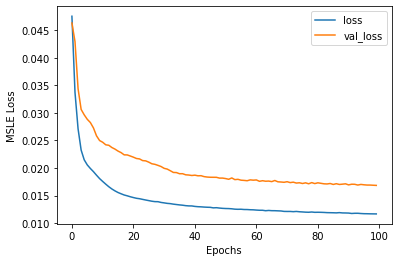

In [346]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [347]:
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
    # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
    # threshold for anomaly scores
    threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
    return threshold

def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
    # provides losses of individual instances
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
    # 0 = anomaly, 1 = normal
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
    return preds

threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test_scaled, threshold)
accuracy_score(predictions, y_test)

Threshold: 0.015180963657156377


0.6058838383838384

In [348]:
print(confusion_matrix(predictions,y_test))

[[21395  1119]
 [14488  2598]]


In [349]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         0.0       0.60      0.95      0.73     22514
         1.0       0.70      0.15      0.25     17086

    accuracy                           0.61     39600
   macro avg       0.65      0.55      0.49     39600
weighted avg       0.64      0.61      0.52     39600



Here, again this result we get is also not that great. So, we can conclude that Random Forest is our best option for this dataset.

#### Now, let's try to remove some features that are not important and try RandomForest Again

In [512]:
X_train, x_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.33, stratify=y)

In [514]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500))

In [525]:
X_train_temp = X_train.loc[:,X_train.columns[np.array(sel.estimator_.feature_importances_).argsort()[::-1][:15]]]

In [527]:
x_test_temp = x_test.loc[:,X_train.columns[np.array(sel.estimator_.feature_importances_).argsort()[::-1][:15]]]

In [519]:
rf = RandomForestClassifier(n_estimators=500)

In [520]:
rf.fit(X_train_temp,y_train)

RandomForestClassifier(n_estimators=500)

In [529]:
y_hat = rf.predict(x_test_temp)

In [530]:
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [540]:
roc_auc_score(y_hat,y_test)

0.9699730309549837

In [541]:
print(classification_report(y_hat,y_test,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      0.95      0.98     37589
     Class 1       0.53      0.99      0.69      2011

    accuracy                           0.96     39600
   macro avg       0.77      0.97      0.83     39600
weighted avg       0.98      0.96      0.96     39600



Here, after dropping some features, we get significant improvement in recall which is what we wanted. Since, our recall is almost perfect, we won't try other algorithms for now.

Referred Links:<br>
https://machinelearningmastery.com/feature-selection-with-categorical-data/<br>
https://medium.com/adj2141/credit-card-fraud-detection-using-machine-learning-899af62df3ab<br>
https://mlopshowto.com/detecting-financial-fraud-using-machine-learning-three-ways-of-winning-the-war-against-imbalanced-a03f8815cce9<br>
https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159<br>
https://stackoverflow.com/questions/40739152/how-to-use-sklearn-featurehasher<br>
https://analyticsindiamag.com/python-guide-to-precision-recall-tradeoff/<br>
https://glassboxmedicine.com/2019/03/02/measuring-performance-auprc/<br>
https://stats.stackexchange.com/questions/113326/what-is-a-good-auc-for-a-precision-recall-curve<br>
http://qingkaikong.blogspot.com/2016/04/plot-histogram-on-clock.html<br>